In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def g(f):
    return -2.5*np.log10(f*10**-6)+8.92

def r(f):
    return -2.5*np.log10(f*10**-6)+8.895#+9.13

In [3]:
import glob

In [4]:
files = glob.glob('/home/tomas/Documents/Research/leo-ztf/grb180523/lightcurves/*.dat')

In [5]:
michael_mag = []
michael_time = []
for i,path in enumerate(files):
    michael_mag.append([])
    michael_time.append([])
    
    temp = np.genfromtxt(path, dtype=[('days','f8'),('mag','f8')],delimiter='\t')
    michael_time[i]=temp['days']*24 #hours
    michael_mag[i]=temp['mag']


In [6]:
data = np.genfromtxt('/home/tomas/Documents/Research/leo-ztf/grb180523/lightcurves/Fong_mag_time_plot', dtype=[('name','S8'),('filter','S2'),('dt','f8'),('flux','f8')], delimiter=",")


In [7]:
mag_r,mag_g=[],[]
t_r,t_g=[],[]

for i in range(len(np.unique(data['name']))):
    mag_r.append([])
    t_r.append([])
    mag_g.append([])
    t_g.append([])
    
j=0
for i in range(len(data['name'])):
    j = np.where(np.unique(data['name']) == data['name'][i])[0][0]
    if data['filter'][i] == b'r':
        mag_r[j].append(r(data['flux'][i]))
        t_r[j].append(data['dt'][i])
    if data['filter'][i] == b'g':
        mag_g[j].append(g(data['flux'][i]))
        t_g[j].append(data['dt'][i])
        

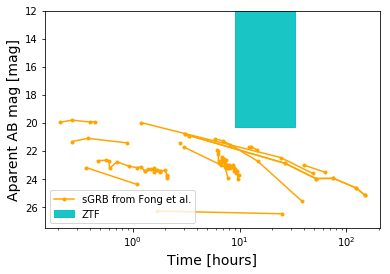

In [8]:
plt.figure()
for i in range(len(mag_r)):
    plt.plot((t_r[i]),mag_r[i],'.-',c='orange')
plt.plot((t_r[0]),mag_r[0],'.-',c='orange',label='sGRB from Fong et al.')
# for i in range(len(michael_mag)):
#     plt.plot((michael_time[i]),michael_mag[i],'.-',c='red',)
# plt.plot((michael_time[i]),michael_mag[i],'.-',c='red',label='Michael data')
plt.xlabel('Time [hours]',fontsize=14)
plt.ylabel('Aparent AB mag [mag]',fontsize=14)
plt.fill_between(([9.1,9.1+24]),11.5,20.3,alpha=0.9,label='ZTF',color='c')
# plt.fill_between(([13*24,28*24]),11.5,24.,alpha=0.9,label='KPED',color='g')
# plt.fill_between(np.log10([1.5,20]),18.5,20.9,alpha=0.8,color='red',label='GRB180626')
plt.ylim(12,27.5)
plt.gca().invert_yaxis()
plt.legend(loc='lower left')
plt.xscale('log')
# plt.savefig('lightcurve2.pdf',dpi=250)


# for i in range(len(mag_r)):
#     plt.plot((t_r[i]),mag_r[i],'.-',c='orange',)
# for i in range(len(michael_mag)):
#     plt.plot((michael_time[i]),michael_mag[i],'.-',c='orange',)
# plt.xlabel('Time [hours]')
# plt.ylabel('r [mag]')
# plt.fill_between(([9.1,9.1+24]),11.5,20.3,alpha=0.9,label='ZTF',color='c')
# plt.fill_between(([13*24,28*24]),11.5,24.,alpha=0.9,label='KPED',color='g')
# # plt.fill_between(np.log10([1.5,20]),18.5,20.9,alpha=0.8,color='red',label='GRB180626')
# plt.ylim(12,27.5)
# plt.gca().invert_yaxis()
# plt.legend(loc='lower left')
# plt.xscale('log')
# plt.savefig('lightcurve_180523_r2.png',dpi=250)

# plt.figure()
# for i in range(len(mag_g)):
#     plt.plot(np.log10(t_g[i]),mag_g[i],'g.-')
# plt.xlabel('Time [hours]')
# plt.ylabel('g [mag]')
# plt.fill_between(np.log10([9.1,9.1+24]),12.5,20.3,alpha=0.9,label='GRB180523')
# # plt.fill_between(np.log10([1.5,20]),18.5,20.9,alpha=0.8,color='red',label='GRB180626')
# plt.ylim(19,27.5)
# plt.gca().invert_yaxis()
# plt.legend(loc='lower left')
# plt.savefig('lightcurve_180523_g.png',dpi=250)




In [9]:
redshift = np.genfromtxt('/home/tomas/Documents/Research/leo-ztf/grb180523/lightcurves/Fong_redshift', dtype=[('name','S8'),('z','f8')], delimiter=",")


In [10]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=67, Om0=0.3)

In [11]:
cosmo.luminosity_distance(4)

<Quantity 37457.137986 Mpc>

In [21]:
d = cosmo.luminosity_distance(0.1).value*1e5
mu = 5*np.log10(d)


In [31]:
10**((21.5+16.5)/5)/10**6

39.81071705534969

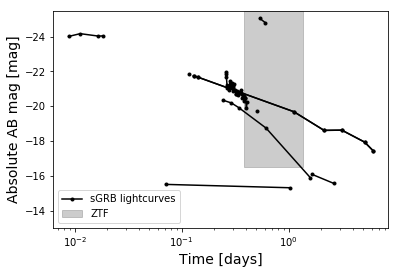

In [35]:
M_r,T_r = [],[]
for i in range(len(redshift['name'])):
    j = np.where(np.unique(data['name']) == redshift['name'][i])[0][0]
    
    d = cosmo.luminosity_distance(redshift['z'][i]).value*1e5
    mu = 5*np.log10(d)
    M_r.append(mag_r[j]-mu)
    T_r.append(t_r[j])

plt.figure()
for i in range(len(M_r)):
    plt.plot((np.array(T_r[i])/24),M_r[i],'.-',c='black')
plt.plot((np.array(T_r[0])/24),M_r[0],'.-',c='black',label='sGRB lightcurves')
# for i in range(len(michael_mag)):
#     plt.plot((michael_time[i]),michael_mag[i],'.-',c='red',)
# plt.plot((michael_time[i]),michael_mag[i],'.-',c='red',label='Michael data')
plt.xlabel('Time [days]',fontsize=14)
plt.ylabel('Absolute AB mag [mag]',fontsize=14)
# plt.fill_between(([9.1,9.1+24]),-17.5,-15,alpha=0.9,label='ZTF',color='c')
plt.fill_between((np.array([9.1,9.1+24])/24),-25.5,-16.5,alpha=0.4,label='ZTF',color='grey')
# plt.fill_between(([13*24,28*24]),11.5,24.,alpha=0.9,label='KPED',color='g')
# plt.fill_between(np.log10([1.5,20]),18.5,20.9,alpha=0.8,color='red',label='GRB180626')
plt.ylim(-25.5,-13)
plt.gca().invert_yaxis()
plt.legend(loc='lower left')
plt.xscale('log')
plt.savefig('lightcurves.png',dpi=250)
